In [24]:
import os
import pandas as pd
from ultralytics import YOLO
from utils import intersection_over_union, model_test
import cv2


image 1/1 /Users/shirin/Documents/Projects_implementation/LineCancellation/datasets/images/test/Image_01.png: 480x640 39 crosseds, 79.9ms
Speed: 1.4ms preprocess, 79.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


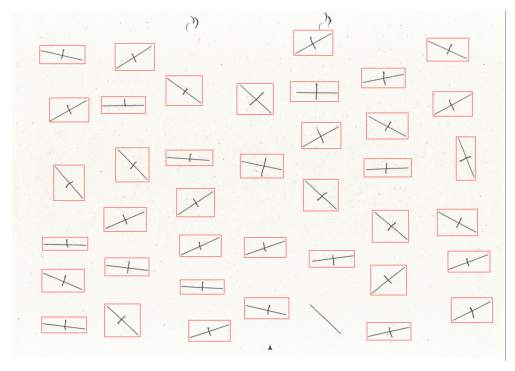

Stroke lines on the right side: 17
Stroke lines on the left side: 18
Total stroke lines 39


In [40]:
# image_list can be one test image or a directory of multiple images
model_best = YOLO('runs/detect/train7/weights/best.pt')

test_path = 'datasets/images/test'
test_image_list = ['Image_01.png'] #os.listdir(test_path)  
output = []
for img in test_image_list:
    if img.endswith(".png"):
        img = os.path.join(test_path, img)
        total_marks, num_marks_left , num_marks_right, results_table,df_IoU = model_test(img, 0.5, model_best)
        print('Stroke lines on the right side:', num_marks_right)
        print('Stroke lines on the left side:', num_marks_left)
        print('Total stroke lines',total_marks)
        output.append({
                'name': os.path.splitext(os.path.basename(img))[0],
                'total_marks': total_marks,
                'right_marks': num_marks_right,
                'left_marks': num_marks_left})
        
    else:
        continue
    
df_output = pd.DataFrame(output)
df_output.to_csv('results_output.csv', index=False)